In [2]:
import torch as t
from torch import nn
import matplotlib.pyplot as plt
t.__version__

'2.0.1+cu117'

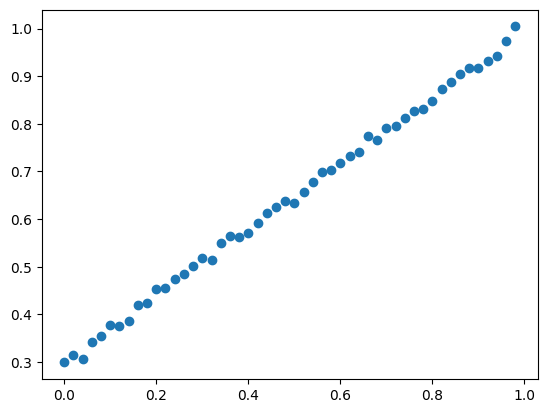

In [3]:
# n=100
# m=3

w=0.7
b=0.3

start = 0 
end = 1
step = 0.02

n=int((end-start)/step)

# X=t.rand(n,1)

X=t.arange(start,end,step).unsqueeze(1)
y=w*X+b
y+=t.randn(n,1)/100
X.shape, y.shape
# X
plt.scatter(X,y)

In [4]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
X_train.size(), X_test.size()

(torch.Size([40, 1]), torch.Size([10, 1]))

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(t.randn(1,requires_grad=True, dtype=t.float))

        self.bias = nn.Parameter(t.randn(1,requires_grad=True, dtype=t.float))

    def forward(self, X: t.Tensor) -> t.Tensor :
        return self.weights*X + self.bias


        

In [68]:
t.manual_seed(42)
m0=LinearRegressionModel()


In [155]:
list(m0.parameters())

[Parameter containing:
 tensor([0.6943], requires_grad=True),
 Parameter containing:
 tensor([0.3006], requires_grad=True)]

In [166]:
m0.state_dict()

OrderedDict([('weights', tensor([0.6943])), ('bias', tensor([0.3006]))])

In [168]:
m0.eval()
m0.forward(X_test)

tensor([[0.8560],
        [0.8699],
        [0.8838],
        [0.8977],
        [0.9116],
        [0.9255],
        [0.9393],
        [0.9532],
        [0.9671],
        [0.9810]], grad_fn=<AddBackward0>)

In [165]:
k1=X_test*w+b
k1.T,test_pred.T, y_test.T

(tensor([[0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
          0.9860]]),
 tensor([[0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
          0.4588]]),
 tensor([[0.8487, 0.8723, 0.8870, 0.9053, 0.9182, 0.9165, 0.9318, 0.9426, 0.9731,
          1.0044]]))

In [24]:
with t.inference_mode():
    pred=m0(X_test)
pred.T,  y_test.T

(tensor([[0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
          0.4588]]),
 tensor([[0.8487, 0.8723, 0.8870, 0.9053, 0.9182, 0.9165, 0.9318, 0.9426, 0.9731,
          1.0044]]))

[6.4, 4.8]

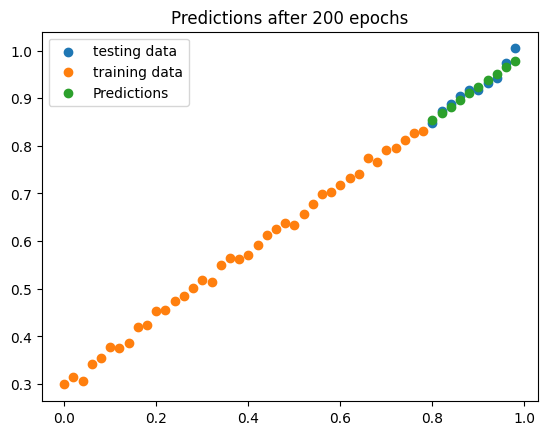

In [215]:
def plot():
    plt.scatter(X_test,y_test, label='testing data')    
    plt.scatter(X_train,y_train, label='training data')
    m0.eval()
    with t.inference_mode():        
        test_pred = m0(X_test)
    plt.scatter(X_test,test_pred, label='Predictions')
    plt.legend()

plot()
plt.title("Predictions after 200 epochs")
# plt.figsize(20,7)
plt.rcParams["figure.figsize"] #[6.4, 4.8]


In [117]:
def reset():
    global m0, optimizer
    m0=LinearRegressionModel()
    optimizer = t.optim.SGD(params = m0.parameters(),lr=0.01)

In [200]:
t.manual_seed(42)
epochs = 200
reset()
train_loss_values=[]
test_loss_values=[]
epoch_list=[]
for epoch in range(epochs):
    m0.train()
    y_pred = m0(X_train)
    loss=loss_f(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item(), round(m0.weights.item(),2), round(m0.bias.item(),2))
    
    m0.eval()
    with t.inference_mode():
        # m0.train()
        test_pred = m0(X_test)
        test_loss=loss_f(test_pred,y_test)
        epoch_list.append(epoch)
        train_loss_values.append(loss.detach())
        test_loss_values.append(test_loss.detach())
        if epoch%10==0:
            print("Epoch ", epoch, " | Test Loss : ", test_loss.item())



0.3119860589504242 0.34 0.14
Epoch  0  | Test Loss :  0.4780603349208832
0.30046504735946655 0.34 0.15
0.2889440655708313 0.35 0.16
0.27742305397987366 0.35 0.17
0.26590201258659363 0.36 0.18
0.25438106060028076 0.36 0.19
0.24286003410816193 0.36 0.2
0.23133902251720428 0.37 0.21
0.21981804072856903 0.37 0.22
0.20829704403877258 0.38 0.23
0.19677603244781494 0.38 0.24
Epoch  10  | Test Loss :  0.343350350856781
0.1852550208568573 0.38 0.25
0.17373402416706085 0.39 0.26
0.1622130274772644 0.39 0.27
0.15069201588630676 0.4 0.28
0.1391710340976715 0.4 0.29
0.12765005230903625 0.4 0.3
0.11655056476593018 0.41 0.31
0.10658083856105804 0.41 0.32
0.09785813838243484 0.41 0.33
0.0897475928068161 0.42 0.33
Epoch  20  | Test Loss :  0.21535396575927734
0.08365585654973984 0.42 0.34
0.07825770229101181 0.43 0.34
0.07334725558757782 0.43 0.35
0.06859304010868073 0.43 0.36
0.06458643823862076 0.44 0.36
0.06100640445947647 0.44 0.37
0.05790834501385689 0.44 0.37
0.05533995106816292 0.45 0.37
0.05342

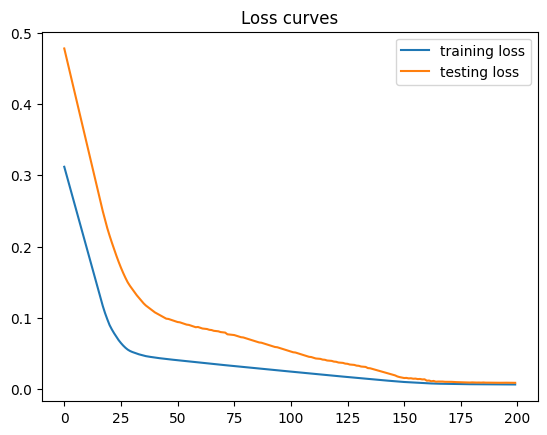

In [202]:
plt.plot(epoch_list,train_loss_values,  label='training loss')

plt.plot(epoch_list,test_loss_values, label='testing loss')
plt.title("Loss curves")


plt.legend()

In [ ]:
# Saving the model:
